In [35]:
#%% Smoothing Filtering
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('Kids_park.jpeg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_moving_avg = cv2.GaussianBlur(img, (9, 9),0)
cv2.imwrite('Gauss.jpg',img_moving_avg)
kernel = cv2.getGaussianKernel(9, 0)
kernel = kernel * kernel.T

laplacian_img = cv2.Laplacian(img_moving_avg, cv2.CV_64F)

laplacian = cv2.filter2D(laplacian_img,-1,kernel)

sobelx_img = cv2.Sobel(img_moving_avg, cv2.CV_64F, 1, 0, ksize=5)
sobely_img = cv2.Sobel(img_moving_avg, cv2.CV_64F, 0, 1, ksize=5)
sobel_img = np.sqrt(sobelx_img**2 + sobely_img**2)
sobel = cv2.filter2D(sobel_img,-1,kernel)

gaussian_img = cv2.GaussianBlur(img_moving_avg, (5, 5), 0)
usm_img = cv2.addWeighted(img_moving_avg, 1.5, gaussian_img, -0.5, 0)

canny_img = cv2.Canny(img_moving_avg, 100, 200)
canny = cv2.filter2D(canny_img,-1,kernel)

cv2.imwrite('laplacian_b.jpg',laplacian)

cv2.imwrite('sobel_b.jpg',sobel)

cv2.imwrite('usm_b.jpg',usm_img)

cv2.imwrite('canny_b.jpg',canny)

True

In [40]:
import cv2
import numpy as np

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('laplacian_b.jpg')

lpsnr = cv2.PSNR(img1, img2)

lapsnr= psnr(img1, img2)
lpsnr

6.321183655389792

In [30]:
img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('sobel_noax.jpg')

sopsnr= psnr(img1, img2)
sopsnr

27.827807515701192

In [31]:
img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('usm_noax.jpg')

usmpsnr= psnr(img1, img2)
usmpsnr

47.23146348533188

In [32]:
img1 = cv2.imread('Gauss.jpg')
img2 = cv2.imread('canny_noax.jpg')

capsnr= psnr(img1, img2)
capsnr

27.75227453028033

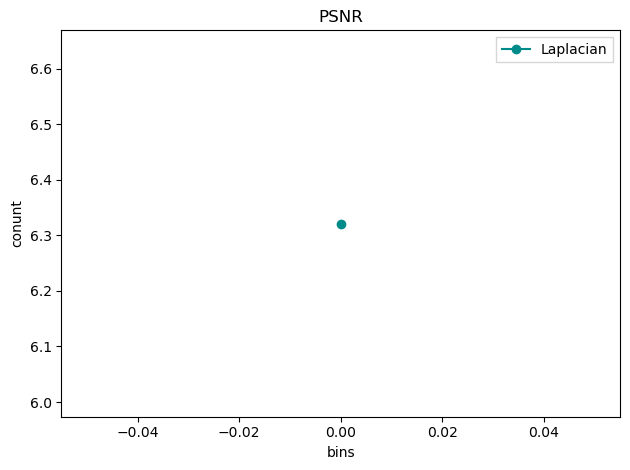

In [42]:
#PSNR low pass-band pass 그래프
plt.plot(lpsnr,marker='o',c='darkcyan',label='Laplacian') #파란색 그래프
'''
plt.plot(sopsnr, marker='D',c='darkmagenta',label='Sobel')
plt.plot(usmpsnr, marker='+',c='darkred',label='USM')
plt.plot(capsnr, marker='x',c='darkblue',label='Canny') #주황색 그래프
'''
plt.legend(shadow=False, fancybox=False, loc='upper right')
plt.title('PSNR'),plt.xlabel('bins'),plt.ylabel('conunt')
plt.tight_layout()
#plt.savefig('PSNR_sharp.jpg')
plt.show()

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

def detect_edges(image, low_threshold=100, high_threshold=200):
    image_8bit = cv2.convertScaleAbs(image)
    return cv2.Canny(image_8bit, low_threshold, high_threshold)

# Read the original image
original_image_gray = cv2.imread('Kids_park.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian, Sobel, USM, and Canny filters to the original grayscale image


sigma = [3,5,7,9,11]
la, so, us, ca = [], [], [], []
psla,psso,psus,psca=[],[],[],[]

for i in sigma:
    gaus_img=cv2.GaussianBlur(original_image_gray,(i,i), 0)
    # Apply Gaussian blur with different sigma values to the filtered images
    sobelx_img = cv2.Sobel(np.uint8(gaus_img), cv2.CV_64F, 1, 0, ksize=5)
    sobely_img = cv2.Sobel(np.uint8(gaus_img), cv2.CV_64F, 0, 1, ksize=5)
    sobelx_abs = cv2.convertScaleAbs(sobelx_img)
    sobely_abs = cv2.convertScaleAbs(sobely_img)
    gaus_sob = cv2.addWeighted(sobelx_abs, 0.5, sobely_abs, 0.5, 0)
    gaussian_img = cv2.GaussianBlur(gaus_img, (5, 5), 0)
    gaus_usm = cv2.addWeighted(gaus_img, 1.5, gaussian_img, -0.5, 0)
    gaus_can  = cv2.Canny(gaus_img, 100, 200)
    gaus_lap =cv2.Laplacian(gaus_img, cv2.CV_64F)

    # Detect edges in the original and sharpened images
    original_edges = detect_edges(original_image_gray)
    sharpened_edges_lap = detect_edges(gaus_lap)
    sharpened_edges_sob = detect_edges(gaus_sob)
    sharpened_edges_usm = detect_edges(gaus_usm)
    sharpened_edges_can = detect_edges(gaus_can)

    # Calculate the SSIM between the edges of the original and sharpened images
    ssim_edges_lap = compare_ssim(original_edges, sharpened_edges_lap)
    ssim_edges_sob = compare_ssim(original_edges, sharpened_edges_sob)
    ssim_edges_usm = compare_ssim(original_edges, sharpened_edges_usm)
    ssim_edges_can = compare_ssim(original_edges, sharpened_edges_can)
    
    psnr_edges_lap = cv2.PSNR(original_edges, sharpened_edges_lap)
    psnr_edges_sob = cv2.PSNR(original_edges, sharpened_edges_sob)
    psnr_edges_usm = cv2.PSNR(original_edges, sharpened_edges_usm)
    psnr_edges_can = cv2.PSNR(original_edges, sharpened_edges_can)

    la.append(ssim_edges_lap)
    so.append(ssim_edges_sob)
    us.append(ssim_edges_usm)
    ca.append(ssim_edges_can)
    psla.append(psnr_edges_lap)
    psso.append(psnr_edges_sob)
    psus.append(psnr_edges_usm)
    psca.append(psnr_edges_can)

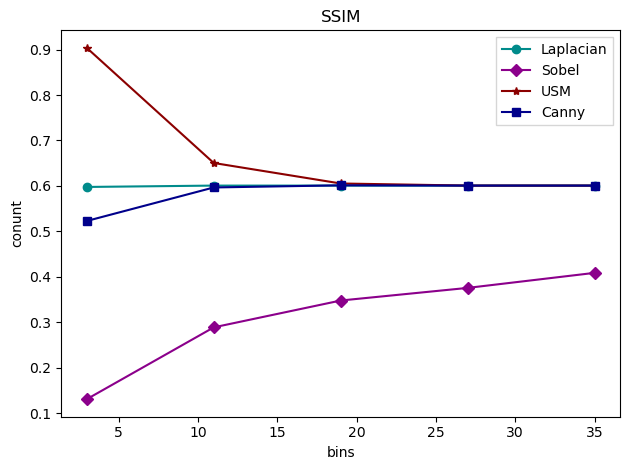

In [7]:
import matplotlib.pyplot as plt
sigma = [3,11,19,27,35]

plt.plot(sigma,la,linestyle='-',marker='o',c='darkcyan',label='Laplacian') #파란색 그래프
plt.plot(sigma,so,linestyle='-',marker='D',c='darkmagenta',label='Sobel')
plt.plot(sigma,us,linestyle='-',marker='*',c='darkred',label='USM') 
plt.plot(sigma,ca,linestyle='-',marker='s',c='darkblue',label='Canny') #주황색 그래프
plt.legend(shadow=False, fancybox=False, loc='upper right')
plt.title('SSIM'),plt.xlabel('bins'),plt.ylabel('conunt')
plt.tight_layout()
plt.show()

In [33]:
original_image_gray = cv2.imread('Kids_park.jpeg', cv2.IMREAD_GRAYSCALE)
gaus_img_3=cv2.GaussianBlur(original_image_gray,(3,3), 0)
cv2.imwrite('Gauss_3.jpg',gaus_img_3)
gaus_img_11=cv2.GaussianBlur(original_image_gray,(5,5), 0)
cv2.imwrite('Gauss_5.jpg',gaus_img_11)
gaus_img_19=cv2.GaussianBlur(original_image_gray,(7,7), 0)
cv2.imwrite('Gauss_7.jpg',gaus_img_19)
gaus_img_27=cv2.GaussianBlur(original_image_gray,(9,9), 0)
cv2.imwrite('Gauss_9.jpg',gaus_img_27)
gaus_img_35=cv2.GaussianBlur(original_image_gray,(11,11), 0)
cv2.imwrite('Gauss_11.jpg',gaus_img_35)

True

In [34]:
gaus_lap_3 =cv2.Laplacian(gaus_img_3, cv2.CV_64F)
cv2.imwrite('la_3.jpg',gaus_lap_3)
gaus_lap_11 =cv2.Laplacian(gaus_img_11, cv2.CV_64F)
cv2.imwrite('la_11.jpg',gaus_lap_11)
gaus_lap_19 =cv2.Laplacian(gaus_img_19, cv2.CV_64F)
cv2.imwrite('la_19.jpg',gaus_lap_19)
gaus_lap_27 =cv2.Laplacian(gaus_img_27, cv2.CV_64F)
cv2.imwrite('la_27.jpg',gaus_lap_27)
gaus_lap_35 =cv2.Laplacian(gaus_img_35, cv2.CV_64F)
cv2.imwrite('la_35.jpg',gaus_lap_35)

True

In [45]:
import numpy as np

la=[]

def rmse(predictions, targets):
    """
    Compute Root Mean Square Error (RMSE) between predictions and targets.

    Parameters:
    predictions (numpy.array or list): Output data from filter 1
    targets (numpy.array or list): Output data from filter 2

    Returns:
    float: The RMSE value
    """
    predictions = np.array(predictions)
    targets = np.array(targets)

    if predictions.shape != targets.shape:
        raise ValueError("The shape of predictions and targets must be the same.")

    return np.sqrt(np.mean((predictions - targets) ** 2))


original_edges = detect_edges(original_image_gray)
cv2.imwrite('ori.jpg',original_edges)
sharpened_edges_lap_3 = detect_edges(gaus_lap_3)
cv2.imwrite('sel3.jpg',sharpened_edges_lap)
ssim_edges_lap = rmse(original_edges, sharpened_edges_lap)
la.append(ssim_edges_lap)

sharpened_edges_lap = detect_edges(gaus_lap_11)
cv2.imwrite('sel11.jpg',sharpened_edges_lap)
ssim_edges_lap = rmse(original_edges, sharpened_edges_lap)
la.append(ssim_edges_lap)

sharpened_edges_lap = detect_edges(gaus_lap_19)
cv2.imwrite('sel19.jpg',sharpened_edges_lap)
ssim_edges_lap = rmse(original_edges, sharpened_edges_lap)
la.append(ssim_edges_lap)

sharpened_edges_lap = detect_edges(gaus_lap_27)
cv2.imwrite('sel27.jpg',sharpened_edges_lap)
ssim_edges_lap = rmse(original_edges, sharpened_edges_lap)
la.append(ssim_edges_lap)

sharpened_edges_lap = detect_edges(gaus_lap_35)
cv2.imwrite('sel35.jpg',sharpened_edges_lap)
ssim_edges_lap = rmse(original_edges, sharpened_edges_lap)
la.append(ssim_edges_lap)

In [44]:
la

[0.3231350192929672,
 0.31074415955717793,
 0.30821884673750943,
 0.3082132797189433,
 0.3082142395569043]

In [ ]:
import cv2
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = metrics.roc_curve(original_edges.ravel(), original_image_gray.ravel())
fpr2, tpr2, thresholds2 = metrics.roc_curve(sharpened_edges.ravel(), img.ravel())

# ROC Curve 그리기
plt.plot(fpr1, tpr1, label='Original Edges')
plt.plot(fpr2, tpr2, label='Sharpened Edges')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
